Se importan las librerías que vamos a utilizar.

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carga de set de datos**

Se cargan los archivos del set de datos.

In [493]:
trata = pd.read_excel('set-de-datos/data_glotip.xlsx') #Lectura de Archivo

Informacion del dataframe.

In [494]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46558 entries, 0 to 46557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNODC              46532 non-null  object
 1   unodc_ddds@un.org  45600 non-null  object
 2   Unnamed: 2         45600 non-null  object
 3   Unnamed: 3         45600 non-null  object
 4   Unnamed: 4         46557 non-null  object
 5   Unnamed: 5         46557 non-null  object
 6   Unnamed: 6         46470 non-null  object
 7   Unnamed: 7         46557 non-null  object
 8   Unnamed: 8         46557 non-null  object
 9   Unnamed: 9         46557 non-null  object
 10  Unnamed: 10        46557 non-null  object
 11  Unnamed: 11        46557 non-null  object
 12  Unnamed: 12        46557 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Se realiza vista previa del dataframe.

In [495]:
trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


Elimino el primer y segundo registro que son irrelevantes.

In [496]:
trata = trata.drop(0)
trata = trata.drop(1)

trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Renombre de columnas.

In [497]:
trata.rename(columns={'UNODC': 'Code', 'unodc_ddds@un.org': 'Country', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'Subregion', 'Unnamed: 4': 'Indicador', 'Unnamed: 5': 'Dimension', 'Unnamed: 6': 'Category', 'Unnamed: 7': 'Sex', 'Unnamed: 8': 'Age', 'Unnamed: 9': 'Year', 'Unnamed: 10': 'Unidad medida', 'Unnamed: 11': 'Value',  'Unnamed: 12': 'Source'}, inplace=True)
trata.head()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [498]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           46530 non-null  object
 1   Country        45599 non-null  object
 2   Region         45599 non-null  object
 3   Subregion      45599 non-null  object
 4   Indicador      46556 non-null  object
 5   Dimension      46556 non-null  object
 6   Category       46469 non-null  object
 7   Sex            46556 non-null  object
 8   Age            46556 non-null  object
 9   Year           46556 non-null  object
 10  Unidad medida  46556 non-null  object
 11  Value          46556 non-null  object
 12  Source         46556 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


In [499]:
trata.describe()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
count,46530,45599,45599,45599,46556,46556,46469,46556,46556,46556,46556,46556,46556
unique,207,200,5,17,5,4,435,5,4,19,1,1250,1
top,NLD,Netherlands,Europe,Latin America and the Caribbean,Detected trafficking victims,Total,Total,Total,Total,2018,Counts,<5,GLOTIP
freq,1094,1094,18415,7896,32364,23802,23802,26824,26647,6407,46556,23076,46556


Limpieza de datos

Se agregan y remplazan codigos de pais

In [500]:
for x in trata.index:
  if trata.loc[x, 'Country'] == 'Sark':
     trata.loc[x, 'Code'] = 'CRQ'
trata[trata['Country'] == 'Sark']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
37753,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2017,Counts,<5,GLOTIP
37754,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2018,Counts,<5,GLOTIP
37755,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2018,Counts,<5,GLOTIP
37756,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2018,Counts,<5,GLOTIP
37757,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2018,Counts,<5,GLOTIP
37758,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2019,Counts,<5,GLOTIP
37759,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2019,Counts,<5,GLOTIP
37760,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2019,Counts,<5,GLOTIP
37761,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2020,Counts,<5,GLOTIP
37762,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2020,Counts,<5,GLOTIP


In [501]:
trata[trata['Code'] == 'Aruba/Curacao']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2670,Aruba/Curacao,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [502]:
for x in trata.index:
  if trata.loc[x, 'Code'] == 'Aruba/Curacao':
     trata.loc[x, 'Code'] = 'ABW'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [503]:
trata.loc[2670, 'Country'] = 'Aruba/Curacao'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [504]:
trata.loc[2670, 'Region'] = 'Americas'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,Americas,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [505]:
trata.loc[2670, 'Subregion'] = 'Latin America and the Caribbean'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [506]:
conjunto_valores = ['CAR', 'CAS', 'MCA', 'MCN', 'EEU', 'SAF', 'SAM' ]
condicion = trata['Code'].isin(conjunto_valores)
trata = trata.drop(trata[condicion].index)

In [507]:
valores_unicos = trata['Code'].unique()
list(valores_unicos)


['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',
 'MEX',
 'MHL',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',


In [509]:
trata['Value'] = trata['Value'].replace('<5', '3')
trata['Value'] = trata['Value'].str.replace(',', '')

In [510]:
valores_unicos = trata['Value'].unique()
list(valores_unicos)

['3',
 '103',
 '167',
 '15',
 '7',
 '34',
 '5',
 '12',
 '17',
 '10',
 '27',
 '23',
 '9',
 '24',
 '6',
 '21',
 '28',
 '8',
 '20',
 '40',
 '44',
 '62',
 '49',
 '57',
 '56',
 '25',
 '16',
 '92',
 '108',
 '14',
 '22',
 '72',
 '94',
 '83',
 '97',
 '37',
 '51',
 '39',
 '45',
 '84',
 '26',
 '66',
 '30',
 '43',
 '52',
 '95',
 '53',
 '42',
 '63',
 '125',
 '31',
 '48',
 '61',
 '109',
 '74',
 '36',
 '67',
 '60',
 '58',
 '91',
 '33',
 '54',
 '46',
 '65',
 '41',
 '35',
 '86',
 '112',
 '47',
 '159',
 '38',
 '59',
 '32',
 '11',
 '139',
 '13',
 '152',
 '29',
 '258',
 '169',
 '111',
 '75',
 '87',
 '70',
 '192',
 '64',
 '149',
 '19',
 '50',
 '131',
 '106',
 '77',
 '73',
 '18',
 '129',
 '186',
 '114',
 '338',
 '422',
 '168',
 '254',
 '178',
 '224',
 '263',
 '196',
 '118',
 '150',
 '76',
 '236',
 '289',
 '303',
 '79',
 '88',
 '215',
 '1757',
 '540',
 '117',
 '204',
 '340',
 '374',
 '127',
 '213',
 '161',
 '2004',
 '628',
 '238',
 '133',
 '319',
 '375',
 '81',
 '142',
 '209',
 '163',
 '182',
 '2386',
 '512

Columna "Dimension"

In [511]:
valores_unicos = trata['Dimension'].unique()
list(valores_unicos)

['by country of repatriation',
 'Total',
 'by form of exploitation',
 'by citizenship']

In [512]:
valores_a_eliminar = ['by country of repatriation', 'by citizenship', 'Total']

# Condición para seleccionar las filas que NO contienen los valores a eliminar
modificar = ~trata['Dimension'].isin(valores_a_eliminar)

# Filtrar el DataFrame usando la condición
trata_new = trata[modificar]
trata_new



,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
7,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2017,Counts,3,GLOTIP
8,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2017,Counts,3,GLOTIP
9,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2018,Counts,3,GLOTIP
10,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2018,Counts,3,GLOTIP
11,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2019,Counts,3,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46553,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,3,GLOTIP
46554,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,3,GLOTIP
46555,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,3,GLOTIP
46556,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,18 years or over,2020,Counts,3,GLOTIP


In [513]:
valor_a_eliminar = ['Total']

# Condición para seleccionar las filas que NO contienen los valores a eliminar
modificar2 = ~trata_new['Category'].isin(valor_a_eliminar)

# Filtrar el DataFrame usando la condición
trata_new2 = trata_new[modificar2]
trata_new2

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
7,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2017,Counts,3,GLOTIP
8,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2017,Counts,3,GLOTIP
9,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2018,Counts,3,GLOTIP
10,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2018,Counts,3,GLOTIP
11,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by form of exploitation,Forced labour,Total,Total,2019,Counts,3,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46553,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,3,GLOTIP
46554,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,3,GLOTIP
46555,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,3,GLOTIP
46556,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,18 years or over,2020,Counts,3,GLOTIP


In [514]:
valor_a_eliminar = ['Total']

# Condición para seleccionar las filas que NO contienen los valores a eliminar
modificar = ~trata_new['Age'].isin(valor_a_eliminar)

# Filtrar el DataFrame usando la condición
trata_new3 = trata_new2[modificar]
trata_new3

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
42,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
43,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
44,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
45,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
46,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Total,0 to 17 years,2017,Counts,15,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Total,0 to 17 years,2021,Counts,54,GLOTIP
46553,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,3,GLOTIP
46554,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,3,GLOTIP
46555,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,3,GLOTIP


In [515]:
valor_a_eliminar = ['Total']

# Condición para seleccionar las filas que NO contienen los valores a eliminar
modificar = ~trata_new['Sex'].isin(valor_a_eliminar)

# Filtrar el DataFrame usando la condición
trata_new4 = trata_new3[modificar]
trata_new4

C:\Users\gisel\AppData\Local\Temp\ipykernel_11880\3137416990.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trata_new4 = trata_new3[modificar]


,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
42,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
43,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
44,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
45,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
49,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,3,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,20,GLOTIP
46553,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,3,GLOTIP
46554,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,3,GLOTIP
46555,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,3,GLOTIP


In [516]:
trata_new4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741 entries, 42 to 46556
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           5741 non-null   object
 1   Country        5741 non-null   object
 2   Region         5741 non-null   object
 3   Subregion      5741 non-null   object
 4   Indicador      5741 non-null   object
 5   Dimension      5741 non-null   object
 6   Category       5741 non-null   object
 7   Sex            5741 non-null   object
 8   Age            5741 non-null   object
 9   Year           5741 non-null   object
 10  Unidad medida  5741 non-null   object
 11  Value          5741 non-null   object
 12  Source         5741 non-null   object
dtypes: object(13)
memory usage: 627.9+ KB


Luego de eliminar valores, se revisa nuevamente

Valores unicos de la columna

In [517]:
valores_unicos = trata_new4["Dimension"].unique()

print(valores_unicos)

['by form of exploitation']


Valores pertenecientes a "by form of explotation":

In [518]:
conteos = trata_new4["Dimension"].value_counts()
print(conteos)

Dimension
by form of exploitation    5741
Name: count, dtype: int64


In [519]:
conteos = trata_new4["Category"].value_counts()
print(conteos)

Category
Sexual exploitation            2003
Forced labour                  1940
Other forms of exploitation    1798
Name: count, dtype: int64


In [520]:
trata_new4.head()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
42,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
43,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
44,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
45,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
49,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,3,GLOTIP


In [521]:
trata_new4.describe()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
count,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741
unique,126,126,5,17,1,1,3,4,3,8,1,296,1
top,THA,Thailand,Europe,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,18 years or over,2018,Counts,3,GLOTIP
freq,129,129,2368,1054,5741,5741,2003,2643,2835,1141,5741,3878,5741


# Regresion Lineal

In [556]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

Cambio el valor de "Value" a entero

In [523]:
trata_new4['Value'] = trata_new4['Value'].astype(int)

C:\Users\gisel\AppData\Local\Temp\ipykernel_11880\2812640329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trata_new4['Value'] = trata_new4['Value'].astype(int)


In [524]:
trata_new4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741 entries, 42 to 46556
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           5741 non-null   object
 1   Country        5741 non-null   object
 2   Region         5741 non-null   object
 3   Subregion      5741 non-null   object
 4   Indicador      5741 non-null   object
 5   Dimension      5741 non-null   object
 6   Category       5741 non-null   object
 7   Sex            5741 non-null   object
 8   Age            5741 non-null   object
 9   Year           5741 non-null   object
 10  Unidad medida  5741 non-null   object
 11  Value          5741 non-null   int32 
 12  Source         5741 non-null   object
dtypes: int32(1), object(12)
memory usage: 605.5+ KB


In [528]:
numero_casos= trata_new4.groupby('Year')['Value'].sum().reset_index()

# Imprimir el resultado
numero_casos

,Year,Value
0,2014,7954
1,2015,10961
2,2016,10959
3,2017,21794
4,2018,22252
5,2019,40266
6,2020,39023
7,2021,24267


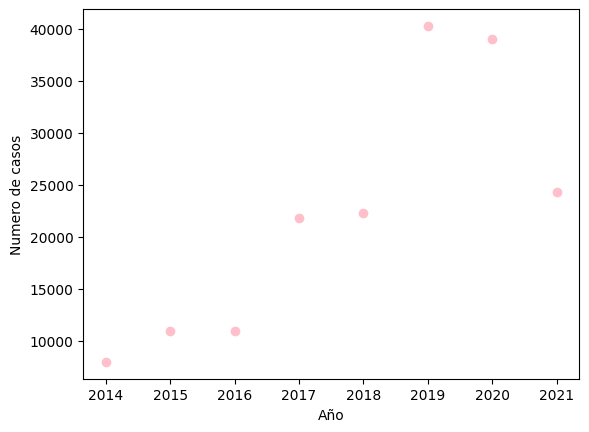

In [529]:
plt.ylabel("Numero de casos")
plt.xlabel("Año")
plt.scatter(numero_casos["Year"], numero_casos["Value"], color="pink")
plt.show()

Aplico el modelo

In [530]:
regresion1 = linear_model.LinearRegression()

In [531]:
años1= numero_casos["Year"].values.reshape((-1,1))
años1

array([[2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]], dtype=int64)

In [532]:
X= años1
y = numero_casos["Value"]

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

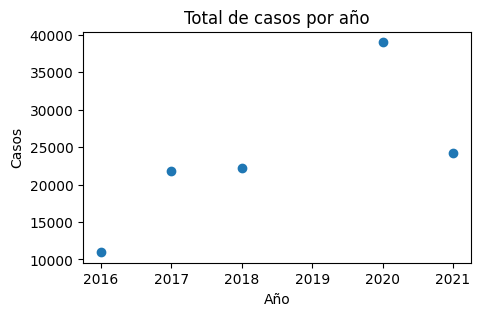

In [534]:
plt.figure(figsize= (5,3))
plt.scatter(X_train, y_train)
plt.ticklabel_format(style="plain")

plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Total de casos por año")
plt.show()

In [535]:
regr1 = LinearRegression()

In [536]:
regr1.fit(X_train,y_train)

LinearRegression()

In [537]:
print(f"Coeficiente :{regr1.coef_[0]}")

Coeficiente :3477.732558139534


In [538]:
print(f"Intercepto: {regr1.intercept_}")

Intercepto: -6995796.395348836


In [539]:
y_predict1 = regr1.predict (X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

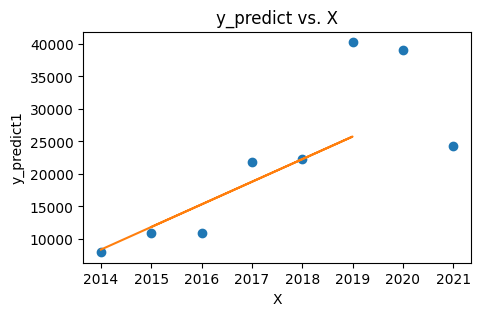

In [540]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test,y_predict1)
plt.title ("y_predict vs. X")
plt.xlabel("X")
plt.ylabel("y_predict1")
plt.ticklabel_format(style="plain")
plt.show

Prediccion hasta el año 2040

In [541]:
X_future1 = np.array(range(2019,2041)).reshape(-1,1)
X_future1.shape

(22, 1)

In [542]:
futuro1 =regr1.predict(X_future1)

<function matplotlib.pyplot.show(close=None, block=None)>

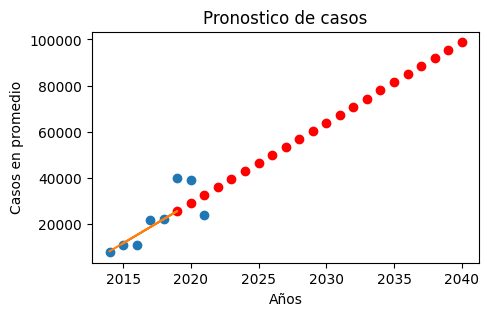

In [543]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test, y_predict1)
plt.scatter(X_future1, futuro1, color= "red")
plt.title ("Pronostico de casos")
plt.xlabel("Años")
plt.ylabel("Casos en promedio")
plt.ticklabel_format(style="plain")
plt.show

Arbol de decision en Argentina para mostrar en que categoria puede tener mas riesgo una persona con un sexo o edad determinada

In [550]:
nombre_del_pais = 'Argentina'

# Filtrar el DataFrame para seleccionar el país de interés
pais_seleccionado = trata_new4[trata_new4['Country'] == nombre_del_pais]

# Ahora, puedes mostrar las características del país seleccionado
pais_seleccionado

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
1052,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2014,Counts,7,GLOTIP
1053,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2014,Counts,3,GLOTIP
1054,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2014,Counts,10,GLOTIP
1055,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2014,Counts,142,GLOTIP
1057,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2014,Counts,11,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42664,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,5,GLOTIP
42665,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,18 years or over,2021,Counts,36,GLOTIP
42666,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Other,0 to 17 years,2021,Counts,3,GLOTIP
42667,ARG,Argentina,Americas,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Other,18 years or over,2021,Counts,3,GLOTIP


In [561]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text


Transformo las variables categoricas de Sex y Age a numeros

In [562]:
label_encoder1 = LabelEncoder()

# Ajustar y transformar la columna categórica
trata_new4['Age'] = label_encoder1.fit_transform(trata_new4['Age'])


C:\Users\gisel\AppData\Local\Temp\ipykernel_11880\1832825735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trata_new4['Age'] = label_encoder1.fit_transform(trata_new4['Age'])


In [563]:
label_encoder2 = LabelEncoder()

# Ajustar y transformar la columna categórica
trata_new4['Sex'] = label_encoder2.fit_transform(trata_new4['Sex'])

C:\Users\gisel\AppData\Local\Temp\ipykernel_11880\2560962120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trata_new4['Sex'] = label_encoder2.fit_transform(trata_new4['Sex'])


In [564]:


# Supongamos que tienes un DataFrame llamado 'data' con las siguientes columnas:
# 'Año', 'País', 'Género', 'Edad', 'Categoría' (donde 'Categoría' es la variable objetivo)

# Filtra el DataFrame para el año 2021 y el país Argentina
data_2021_argentina = trata_new4[(trata_new4['Year'] == 2021) & (trata_new4['Country'] == 'Argentina')]

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = data_2021_argentina[['Sex', 'Age']]
y = data_2021_argentina['Category']

# Convierte variables categóricas en variables numéricas usando one-hot encoding
X = pd.get_dummies(X, columns=['Sex'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Mostrar el árbol de decisión
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Árbol de Decisión:")
print(tree_rules)

Precisión del modelo: 20.00%
Árbol de Decisión:
|--- Sex_0 <= 0.50
|   |--- Sex_1 <= 0.50
|   |   |--- Sex_2 <= 0.50
|   |   |   |--- class: Forced labour
|   |   |--- Sex_2 >  0.50
|   |   |   |--- Age <= 0.50
|   |   |   |   |--- class: Forced labour
|   |   |   |--- Age >  0.50
|   |   |   |   |--- class: Forced labour
|   |--- Sex_1 >  0.50
|   |   |--- Age <= 0.50
|   |   |   |--- class: Forced labour
|   |   |--- Age >  0.50
|   |   |   |--- class: Forced labour
|--- Sex_0 >  0.50
|   |--- class: Other forms of exploitation

